In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
# https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
heart_disease_data = pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [11]:
heart_disease_data.shape

(297, 14)

In [12]:
heart_disease_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [13]:
# Correlation 

correlation = heart_disease_data.corr()

<Axes: >

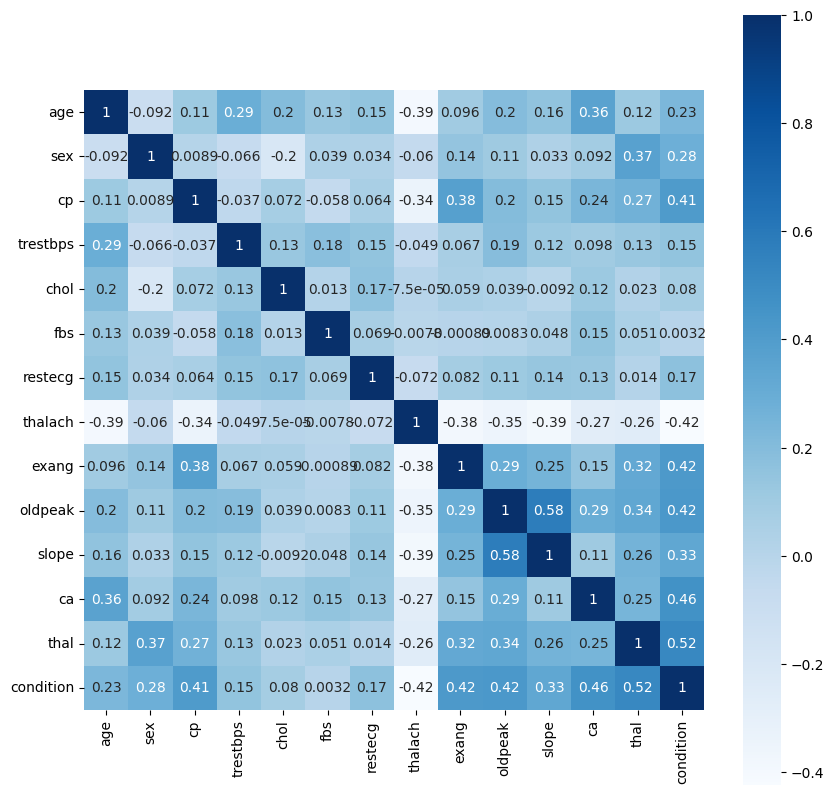

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, cmap = 'Blues', annot = True, square = True)

In [17]:
# Separating Features and Labels

X = heart_disease_data.drop('condition', axis = 1)
Y = heart_disease_data['condition']

print(X.shape, Y.shape)

(297, 13) (297,)


In [19]:
# Spliting the data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)
print(X.shape, X_train.shape, X_test.shape)

(297, 13) (267, 13) (30, 13)


In [21]:
# Model 
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
model = LogisticRegression()

# fit the model with data
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
acc = metrics.accuracy_score(Y_test, y_pred)
print(cnf_matrix)
print(acc)

[[14  2]
 [ 3 11]]
0.8333333333333334
